# National Hockey League Players Salary Prediction

## Introduction

As a National Hockey League (NHL) fan I've been curious as to what factors make up a good player and what earns them the big bucks. My goal is to use KNN-regression to predict NHL players salaries. I'll use predictor selection method to see which predictors will be most useful in determining salaries. Hopefully this experience will help me become more familiar with R, Jupyter, and NHL statistics.

Data comes from: https://data.world/sportsvizsunday/2020-april-twitter-sports/workspace/file?filename=NHL+Stats.xlsx

Some terminology that are useful to know are the following:

....


## Reading the Data

First, let's load in the libraries and get the data.

In [1]:
library("httr")
library("readxl")
library("tidyverse")
library("magrittr")
library("Hmisc")
library("tidymodels")
library("devtools")
library("ggplot2")
library("GGally")

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract


Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units


Registered S3 method overwritten by 'tune':
  me

In [2]:
invisible(GET("https://query.data.world/s/67ihloexi4bnlyn66lxwrf7jpo2hwc", write_disk(tf <- tempfile(fileext = ".xlsx"))))
salary_df <- read_excel(tf, sheet = 1)
stat_df <- read_excel(tf, sheet = 2) 

Lets take a look at our two data sets

In [3]:
options(repr.matrix.max.cols=34, repr.matrix.max.rows=10)
head(salary_df)
head(stat_df) 

Player,Tm,Salary,Cap Hit
<chr>,<chr>,<dbl>,<chr>
Mitch Marner,TOR,16000000,10893000
John Tavares,TOR,15900000,11000000
Auston Matthews,TOR,15900000,11634000
Carey Price,MTL,15000000,10500000
Connor McDavid,EDM,15000000,12500000
Artemi Panarin,NYR,14000000,11642857


Player,Team,Position,GP,TOI,Goals,Total Assists,First Assists,Second Assists,Total Points,IPP,Shots,SH%,ixG,iCF,iFF,iSCF,iHDCF,Rush Attempts,Rebounds Created,PIM,Total Penalties,Minor,Major,Misconduct,Penalties Drawn,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs Won,Faceoffs Lost,Faceoffs %
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Leon Draisaitl,EDM,C,65,1475.133,39,63,37,26,102,81.599999999999994,202,19.309999999999999,27.05,372,278,248,90,16,25,16,8,8,0,0,19,77,53,25,83,19,595,554,51.78
David Pastrnak,BOS,R,66,1257.817,47,44,29,15,91,78.45,257,18.29,23.46,478,355,247,91,9,30,38,19,19,0,0,25,87,49,45,107,20,7,11,38.89
Artemi Panarin,NYR,"C, L",64,1302.850,32,58,30,28,90,75.63,196,16.329999999999998,16.92,377,280,192,42,9,24,18,9,9,0,0,14,75,50,23,48,17,1,1,50
Connor McDavid,EDM,C,59,1297.217,31,58,35,23,89,78.069999999999993,197,15.74,20.67,316,246,219,93,15,21,28,14,14,0,0,23,74,51,34,54,18,289,316,47.77
Nathan MacKinnon,COL,C,64,1364.133,33,52,33,19,85,77.27,298,11.07,22.69,510,375,256,65,12,33,12,5,5,0,0,22,52,37,49,74,30,340,455,42.77
Brad Marchand,BOS,"C, L",66,1293.783,27,56,35,21,83,69.17,179,15.08,20.12,291,232,183,72,8,16,72,28,25,2,1,42,68,41,53,90,18,20,29,40.82


## Tidying the Data

Let's merge the two to get one data set.

In [4]:
options(repr.matrix.max.cols=30, repr.matrix.max.rows=10)
df <- merge(salary_df,stat_df,by="Player")
head(df)

,Player,Tm,Salary,Cap Hit,Team,Position,GP,TOI,Goals,Total Assists,First Assists,Second Assists,Total Points,IPP,Shots,⋯,Rebounds Created,PIM,Total Penalties,Minor,Major,Misconduct,Penalties Drawn,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs Won,Faceoffs Lost,Faceoffs %
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Aaron Ekblad,FLA,9000000,7500000,FLA,D,64,1465.1333,5,34,22,12,39,44.32,145,⋯,15,24,12,12,0,0,9,66,35,33,53,79,0,0,-
2,Aaron Ness,ARI,725000,725000,ARI,D,24,300.8333,0,1,1,0,1,7.69,11,⋯,0,0,0,0,0,0,5,8,1,17,49,20,0,0,-
3,Adam Boqvist,CHI,925000,894167,CHI,D,38,619.5000,4,5,3,2,9,29.03,47,⋯,5,6,3,3,0,0,7,26,10,30,54,39,0,0,-
4,Adam Erne,DET,1050000,1050000,DET,L,56,661.7000,2,3,3,0,5,55.56,63,⋯,5,28,10,9,0,1,6,27,5,142,32,25,20,13,60.61
5,Adam Fox,NYR,925000,925000,NYR,D,65,1222.6667,7,28,18,10,35,45.45,120,⋯,15,26,13,13,0,0,10,57,55,32,87,86,0,0,-
6,Adam Gaudette,VAN,925000,916667,VAN,C,55,688.6833,11,19,6,13,30,73.17,71,⋯,6,35,11,9,1,1,9,15,23,28,39,17,173,255,40.42


Let's make the column names easier to work with by replacing the spaces with periods.

In [5]:
colnames(df) <- make.names(colnames(df))

In [6]:
df_F <- df %>%
filter(GP > 5) 

We can get rid of some of the columns right of the bat, like some non-numerical columns. I'm also going to eliminate the faceoff columns due to the amount of missing data. Cap Hit is another way of measuring the income a player makes. Since we're predicting salary let's remove the Cap Hit column.
iCF, iFF, iSCF, and iHDCF are all related to shots/scoring chances so in order to make our model more efficient let's just keep iHDCF (high danger scoring chance outside of shootouts). For the same reason, let's remove Minor, Major, and Total Penalties and we will keep PIM (Penalty minutes). Let's also just keep total assists and remove 1st assists and 2nd assists.

In [7]:
df_tidy <- df_F %>%
select(-Player, -Tm, -Cap.Hit:-Position, -Faceoffs.Won:-Faceoffs.., -iCF, -iFF,
       -iSCF, -Total.Penalties, -Minor, -Major, -First.Assists, -Second.Assists)

Let's also make sure each column has the correct data type listed

In [8]:
df_tidy$IPP <- as.double(df_tidy$IPP)
df_tidy$SH. <- as.double(df_tidy$SH.)

A couple values that were listed as "inf" became NA values which means the same thing.

Let's also rename "SH." to be "SH" and eliminate rows with na values.

In [9]:
df_tidy <- df_tidy %>%
mutate(SH = SH.) %>%
select(-SH.)

In [10]:
options(repr.matrix.max.cols=30, repr.matrix.max.rows=10)
nhl_tidy <- df_tidy %>%
na.omit()
nhl_tidy

,Salary,GP,TOI,Goals,Total.Assists,Total.Points,IPP,Shots,ixG,iHDCF,Rush.Attempts,Rebounds.Created,PIM,Misconduct,Penalties.Drawn,Giveaways,Takeaways,Hits,Hits.Taken,Shots.Blocked,SH
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9000000,64,1465.1333,5,34,39,44.32,145,6.64,18,6,15,24,0,9,66,35,33,53,79,3.45
2,725000,24,300.8333,0,1,1,7.69,11,0.40,0,0,0,0,0,5,8,1,17,49,20,0.00
3,925000,38,619.5000,4,5,9,29.03,47,2.81,5,1,5,6,0,7,26,10,30,54,39,8.51
4,1050000,56,661.7000,2,3,5,55.56,63,5.21,33,7,5,28,1,6,27,5,142,32,25,3.17
5,925000,65,1222.6667,7,28,35,45.45,120,8.14,19,2,15,26,0,10,57,55,32,87,86,5.83
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
607,2000000,53,845.0667,14,16,30,58.82,88,10.37,63,8,9,69,2,10,39,22,142,53,7,15.91
608,925000,13,131.8333,2,1,3,50.00,11,1.08,7,1,1,16,0,4,7,2,30,17,3,18.18
609,3250000,50,589.3333,4,7,11,57.89,43,3.24,22,5,7,29,0,6,14,21,112,71,18,9.30


Finally, let's turn some of these variables into proportions based of off how many games the player has played

In [11]:
nhl_tidy <- nhl_tidy %>%
mutate(TOI = TOI/GP,
      Goals = Goals/GP,
      Total.Assists = Total.Assists/GP,
      Total.Points = Total.Points/GP,
      Shots = Shots/GP,
      iHDCF = iHDCF/GP,
      Rush.Attempts = Rush.Attempts/GP,
      Rebounds.Created = Rebounds.Created/GP,
      PIM = PIM/GP,
      Misconduct = Misconduct/GP,
      Penalties.Drawn = Penalties.Drawn/GP,
      Giveaways = Giveaways/GP,
      Takeaways = Takeaways/GP,
      Hits = Hits/GP,
      Hits.Taken = Hits.Taken/GP,
      Shots.Blocked = Shots.Blocked/GP)

In [12]:
head(nhl_tidy)

,Salary,GP,TOI,Goals,Total.Assists,Total.Points,IPP,Shots,ixG,iHDCF,Rush.Attempts,Rebounds.Created,PIM,Misconduct,Penalties.Drawn,Giveaways,Takeaways,Hits,Hits.Taken,Shots.Blocked,SH
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9000000,64,22.89271,0.07812500,0.53125000,0.60937500,44.32,2.2656250,6.64,0.2812500,0.09375000,0.23437500,0.3750000,0.00000000,0.1406250,1.0312500,0.54687500,0.5156250,0.8281250,1.2343750,3.45
2,725000,24,12.53472,0.00000000,0.04166667,0.04166667,7.69,0.4583333,0.40,0.0000000,0.00000000,0.00000000,0.0000000,0.00000000,0.2083333,0.3333333,0.04166667,0.7083333,2.0416667,0.8333333,0.00
3,925000,38,16.30263,0.10526316,0.13157895,0.23684211,29.03,1.2368421,2.81,0.1315789,0.02631579,0.13157895,0.1578947,0.00000000,0.1842105,0.6842105,0.26315789,0.7894737,1.4210526,1.0263158,8.51
4,1050000,56,11.81607,0.03571429,0.05357143,0.08928571,55.56,1.1250000,5.21,0.5892857,0.12500000,0.08928571,0.5000000,0.01785714,0.1071429,0.4821429,0.08928571,2.5357143,0.5714286,0.4464286,3.17
5,925000,65,18.81026,0.10769231,0.43076923,0.53846154,45.45,1.8461538,8.14,0.2923077,0.03076923,0.23076923,0.4000000,0.00000000,0.1538462,0.8769231,0.84615385,0.4923077,1.3384615,1.3230769,5.83
6,925000,55,12.52152,0.20000000,0.34545455,0.54545455,73.17,1.2909091,8.61,0.6000000,0.05454545,0.10909091,0.6363636,0.01818182,0.1636364,0.2727273,0.41818182,0.5090909,0.7090909,0.3090909,15.49


## Training and Testing

It's time to split data into training and testing

In [13]:
set.seed(68)
nhl_split <- initial_split(nhl_tidy, prop = 0.75, strata = Salary)
nhl_train <- training(nhl_split)
nhl_test <- testing(nhl_split)

Now we can use our training data to create a model!

## Exploring the Data

Lets explore the data first to get a sense of it.

First we can create a histogram of NHL player salaries.

Let's take a look at what the salaries look like in millions

In [14]:
nhl_train_salaries_mil <- nhl_train %>%
mutate(Salary_Mil = Salary/1000000)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



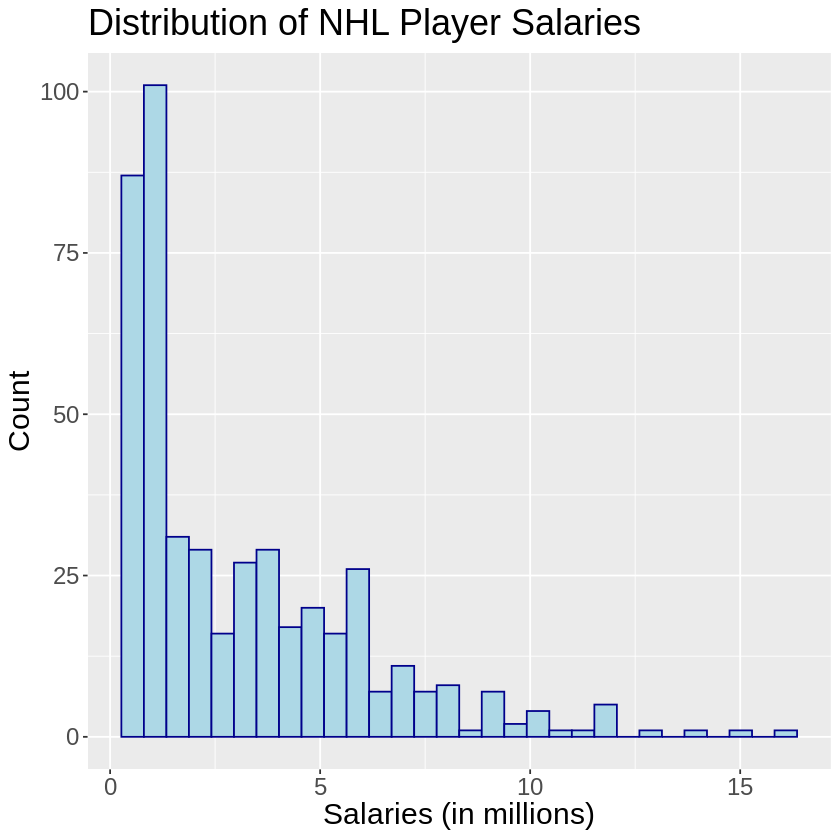

In [15]:
nhl_salary_dist_mil <- nhl_train_salaries_mil %>%
ggplot(aes(x=Salary_Mil)) +
geom_histogram(color="darkblue", fill="lightblue") +
ggtitle("Distribution of NHL Player Salaries") +
xlab("Salaries (in millions)") +
ylab("Count")+
theme(text = element_text(size = 18))
nhl_salary_dist_mil

It looks like most players are in the one to five million range while there are a couple with salaries as high as 15 million.

Let's take a look at the histograms of all the variables.

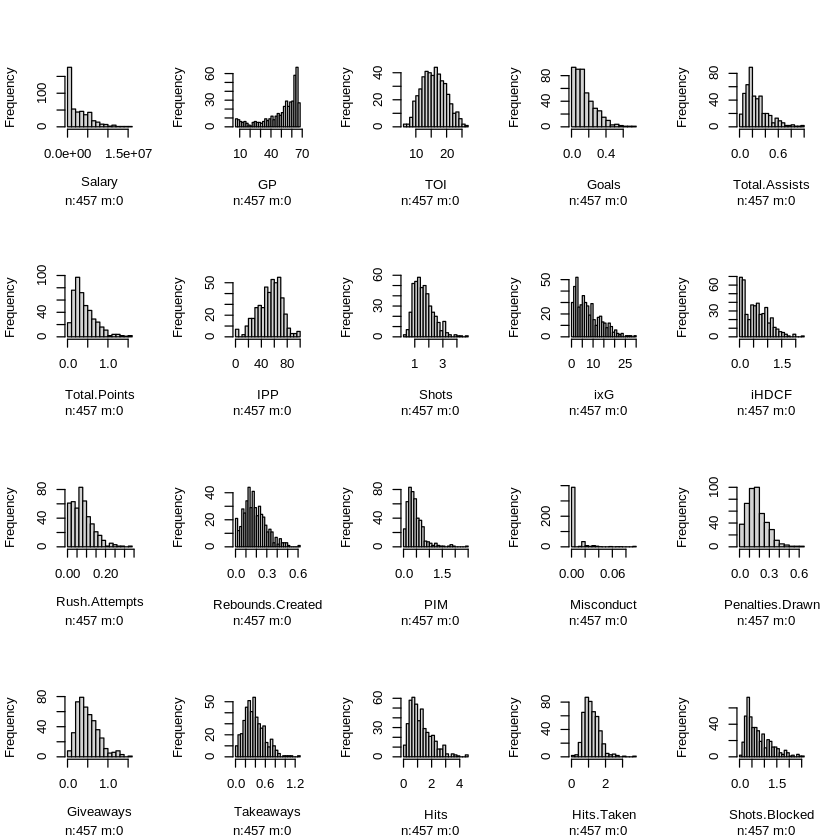

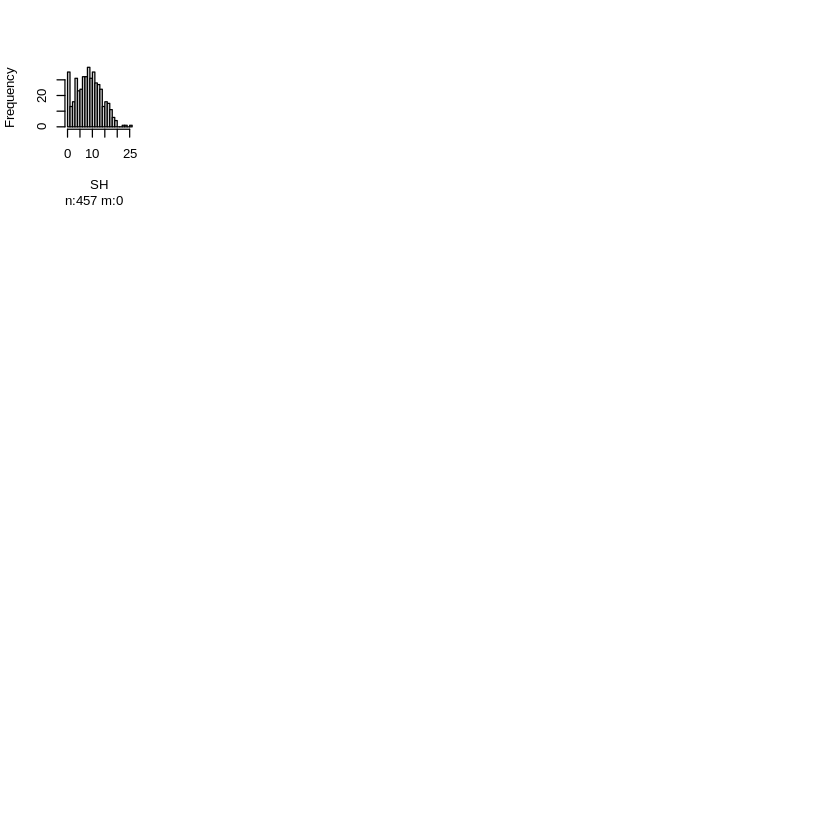

In [16]:
many_hist <- nhl_train %>%
hist.data.frame()

Most of these histograms are uni modal and right skewed. This can tell us different things for different variables. For example, in the hits category, it seems that almost all players hit others but there are a few that do it quite frequently.

## Model

Let's use KNN regression and find the best number of neighbours to use.

In [17]:
set.seed(68)
nhl_recipe <- recipe(Salary ~ TOI + Goals + Total.Assists + Shots + Rebounds.Created + iHDCF, 
                     data = nhl_train) %>%
step_scale(all_predictors()) %>%
step_center(all_predictors())

In [18]:
set.seed(68)
nhl_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("regression")

In [19]:
set.seed(68)
nhl_vfold <- vfold_cv(nhl_train, v = 5, strata = Salary)

In [20]:
gridvals <- tibble(neighbors = seq(from = 1, to = 30, by = 1))

In [21]:
set.seed(68)
nhl_k <- workflow() %>%
  add_recipe(nhl_recipe) %>%
  add_model(nhl_spec) %>%
  tune_grid(resamples = nhl_vfold, grid = gridvals) %>%
  collect_metrics() %>%
  filter(.metric == "rmse") 
nhl_k

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,2619062,5,190375.1,Preprocessor1_Model01
2,rmse,standard,2223367,5,182136.1,Preprocessor1_Model02
3,rmse,standard,2193969,5,165449.9,Preprocessor1_Model03
4,rmse,standard,2132455,5,141918.4,Preprocessor1_Model04
5,rmse,standard,2083719,5,141355.7,Preprocessor1_Model05
⋮,⋮,⋮,⋮,⋮,⋮,⋮
26,rmse,standard,2061330,5,109039.6,Preprocessor1_Model26
27,rmse,standard,2062762,5,106612.5,Preprocessor1_Model27
28,rmse,standard,2065359,5,107725.1,Preprocessor1_Model28


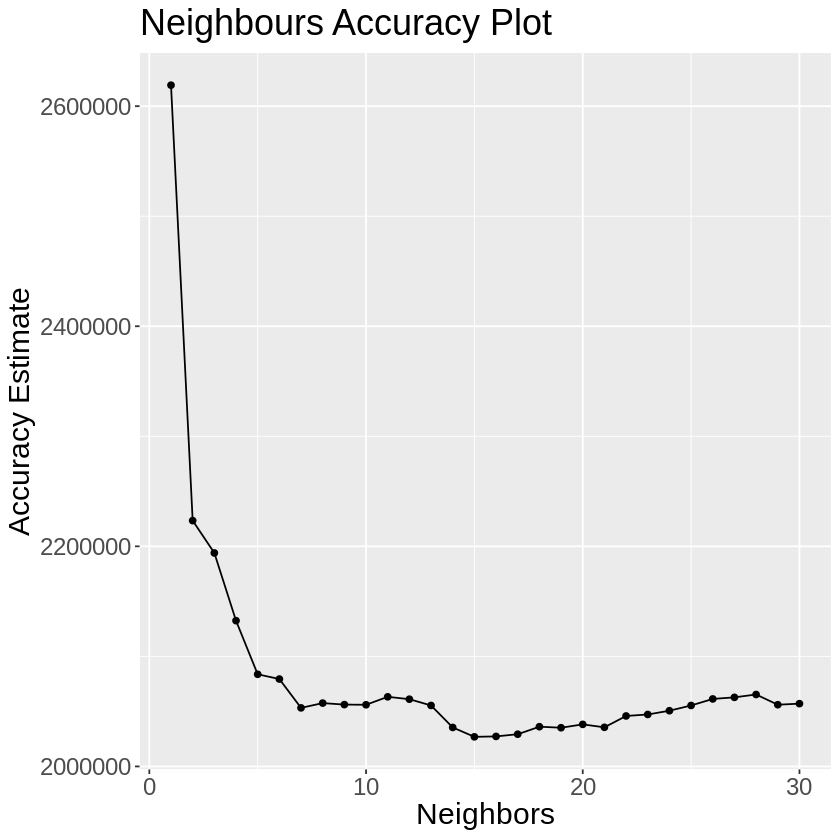

In [22]:
neighbours_plot <- ggplot(nhl_k, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() + 
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  ggtitle("Neighbours Accuracy Plot") +
  theme(text = element_text(size = 18))
neighbours_plot


In [24]:
nhl_min <- nhl_k %>%
  filter(mean == min(mean)) 
nhl_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
15,rmse,standard,2026886,5,104561.4,Preprocessor1_Model15


Looks like the best number of neighbours is 19.

Ended up removing: Shots.Blocked, Hits, + Giveaways + GP + Total.Points + SH + iHDCF + Rush.Attempts + PIM + Penalties.Drawn + Takeaways + Hits.Taken + Misconduct + Giveaways

## Evaluation

In [27]:
set.seed(68)
nhl_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 19) |>
  set_engine("kknn") |>
  set_mode("regression")
 
nhl_fit <- workflow() |>
  add_recipe(nhl_recipe) |>
  add_model(nhl_spec) |>
  fit(data = nhl_train)
 
nhl_summary <- nhl_fit |>
  predict(nhl_test) |>
  bind_cols(nhl_test) |>
  metrics(truth = Salary, estimate = .pred) |>
  filter(.metric == 'rmse')
 
nhl_summary


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,2243100


## Conclusion

- got mean down by making it per game statistics
- played around with removing predicotrs
- 2243100 is pretty high compared to the value we got from the training data - maybe due to selection method of predictors - catering too much to the training data and not thi
- Very enjoyable project